# Loans Exploration
## by Alexandria Thompson

## Preliminary Wrangling

> The dataset used for this exploration is a csv file that has loan characteristic data from Prosper.

In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [78]:
# Read in csv file
loans = pd.read_csv('prosperloandata.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [36]:
# Examine the structure of the dataframe
loans.shape

(113937, 81)

In [37]:
# List the column data types
loans.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [38]:
# Examine non-null rows to see where there is missing data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [39]:
# Drop unneccessary columns
loans = loans[['Investors', 'ListingCategory (numeric)', 'ProsperScore', 'Term', 'LoanOriginalAmount', 'EstimatedLoss', 'EstimatedReturn', 'DebtToIncomeRatio', 'LenderYield']]

In [40]:
# Make sure the dataframe contains correct columns
loans.head()

,Investors,ListingCategory (numeric),ProsperScore,Term,LoanOriginalAmount,EstimatedLoss,EstimatedReturn,DebtToIncomeRatio,LenderYield
0,258,0,NaN,36,9425,NaN,NaN,0.17,0.1380
1,1,2,7.0,36,10000,0.0249,0.05470,0.18,0.0820
2,41,0,NaN,36,3001,NaN,NaN,0.06,0.2400
3,158,16,9.0,36,10000,0.0249,0.06000,0.15,0.0874
4,20,2,4.0,36,15000,0.0925,0.09066,0.26,0.1985


In [41]:
# Drop rows that are null in PropsperScore column
loans = loans.dropna(subset = ['ProsperScore'])

In [42]:
# Check to make sure rows were dropped
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 9 columns):
Investors                    84853 non-null int64
ListingCategory (numeric)    84853 non-null int64
ProsperScore                 84853 non-null float64
Term                         84853 non-null int64
LoanOriginalAmount           84853 non-null int64
EstimatedLoss                84853 non-null float64
EstimatedReturn              84853 non-null float64
DebtToIncomeRatio            77557 non-null float64
LenderYield                  84853 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.5 MB


In [43]:
# Change the column name 
loans = loans.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'})
loans.head()

,Investors,ListingCategory,ProsperScore,Term,LoanOriginalAmount,EstimatedLoss,EstimatedReturn,DebtToIncomeRatio,LenderYield
1,1,2,7.0,36,10000,0.0249,0.05470,0.18,0.0820
3,158,16,9.0,36,10000,0.0249,0.06000,0.15,0.0874
4,20,2,4.0,36,15000,0.0925,0.09066,0.26,0.1985
5,1,1,10.0,60,15000,0.0449,0.07077,0.36,0.1214
6,1,1,2.0,36,3000,0.1275,0.11070,0.27,0.2612


In [44]:
# Convert data type of Listing Category to str. 
loans['ListingCategory'] = loans['ListingCategory'].astype(str)
loans['Term'] = loans['Term'].astype(str)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 9 columns):
Investors             84853 non-null int64
ListingCategory       84853 non-null object
ProsperScore          84853 non-null float64
Term                  84853 non-null object
LoanOriginalAmount    84853 non-null int64
EstimatedLoss         84853 non-null float64
EstimatedReturn       84853 non-null float64
DebtToIncomeRatio     77557 non-null float64
LenderYield           84853 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 6.5+ MB


In [45]:
# Examine statistical data
loans.describe()

,Investors,ProsperScore,LoanOriginalAmount,EstimatedLoss,EstimatedReturn,DebtToIncomeRatio,LenderYield
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,77557.000000,84853.000000
mean,68.264669,5.950067,9083.440515,0.080306,0.096068,0.258752,0.186017
std,95.195831,2.376501,6287.860058,0.046764,0.030403,0.318326,0.074631
min,1.000000,1.000000,1000.000000,0.004900,-0.182700,0.000000,0.030000
25%,1.000000,4.000000,4000.000000,0.042400,0.074080,0.150000,0.125900
50%,32.000000,6.000000,7500.000000,0.072400,0.091700,0.220000,0.177500
75%,97.000000,8.000000,13500.000000,0.112000,0.116600,0.320000,0.247400
max,1189.000000,11.000000,35000.000000,0.366000,0.283700,10.010000,0.340000


### What is the structure of your dataset?

> There are 113,937 loans with 81 features. Most of the factors are numerical but some of them are categorical like the loan status. There are also some columns that have boolean values, for example if the borrower is a homeowner or if their income was verifired.  

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out what factors are best for predicting the lender yield. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that listing category will have the most effect on the lender yield. I also think that the prosper score, term, loan original amount, estimated loss, estimated return, debt to income ratio, listing category, and the number of investors will have some effect on the lender yield.

## Univariate Exploration

> In this section I will investigate each variable of interest individually. 

>First I will look at the number of investors funding the loan. 

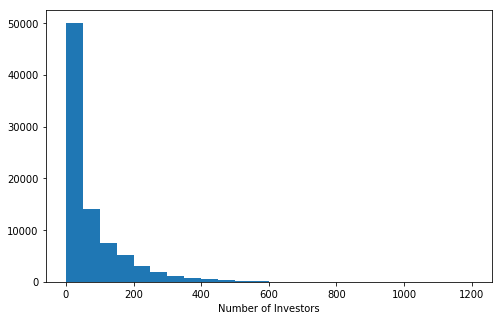

In [46]:
# Histogram number of investors variable
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['Investors'].max()+50, 50)

plt.hist(data = loans, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.show()


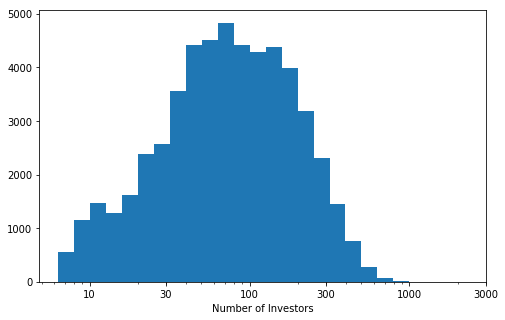

In [47]:
# Histogram of log scale transform on number of investors
bins = 10 ** np.arange(0.8, np.log10(loans['Investors'].max())+0.1, 0.1)
plt.figure(figsize = [8, 5])
           
plt.hist(data = loans, x = 'Investors', bins = bins)
plt.xscale('log')
ticks = [10, 30, 100, 300 , 1000, 3000]
plt.xticks(ticks, ticks)
plt.xlabel('Number of Investors')         
plt.show()

>On the first plot you can see the that number of investors has a long-tail distribution, where there are a lot of loans with a small number of investors and less loans with more investors. After plotting the number of investors on a log-scale you can see that there is more of a normal distrbution but it is still left skewed, showing that there are more loans in the middle of the distirbution with investor numbers around 100. There is also a steady increase in investor numbers on the left side of the distribution but as the number of investors increases past 300 there is a steeper decrease in the number of loans. 

>I will now look at the listing category. 

In [48]:
# Replace numbered categories with actual name of category so it is easier to understand
loans['ListingCategory'] = loans['ListingCategory'].replace({'0': 'NA', '1': 'DebtConsolidation', 
                                                             '2': 'HomeImprovement', '3': 'Business', '4': 'PersonalLoan', 
                                                             '5': 'StudentUse', '6':'Auto', '7':'Other', '8':'Baby&Adoption', 
                                                            '9':'Boat', '10':'CosmeticProcedure', '11':'EngagementRing', '12':'GreenLoans',
                                                            '13':'HouseholdExpenses', '14':'LargePurchases', '15':'MedicalDental',
                                                            '16':'Motorcycle', '17':'RV', '18':'Taxes', '19':'Vacation', '20':'WeddingLoans'})

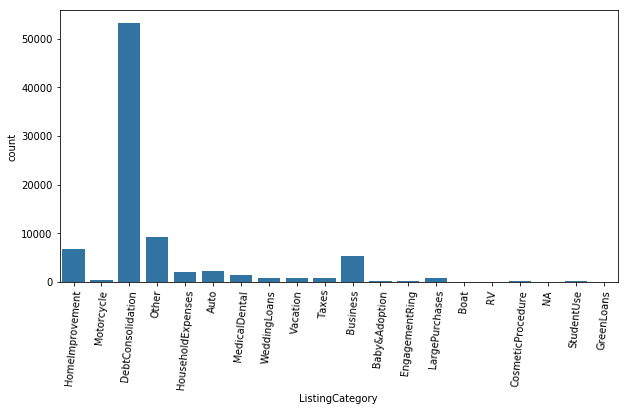

In [49]:
# Count plot listing category
plt.figure(figsize = [10,5])

color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'ListingCategory', color = color)
plt.xticks(rotation = 85);

>It looks like a large portion of the loans fall under the category of category debt consolidation, where the count is above 50,000. The next closest loan category is other and then home improvement. 

>The next variable I will look at is the propser score.

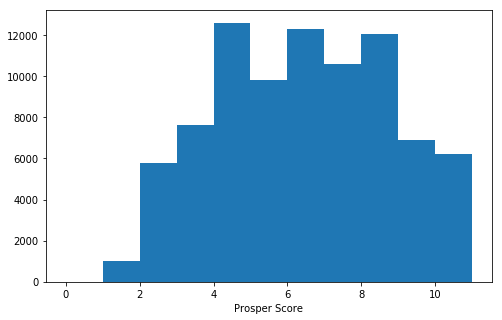

In [50]:
# Histogram prosper score
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['ProsperScore'].max()+1, 1)

plt.hist(data = loans, x = 'ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.show()


In [51]:
# Count of loans for each prosper score
loans.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

>It looks like there are some scores above 10 which must be some incorrect entries because the score maximum is 10, so I am going to drop the rows that have a score over 10.  

In [52]:
# Drop rows with prosper scores over 10
loans = loans[loans['ProsperScore'] <= 10]

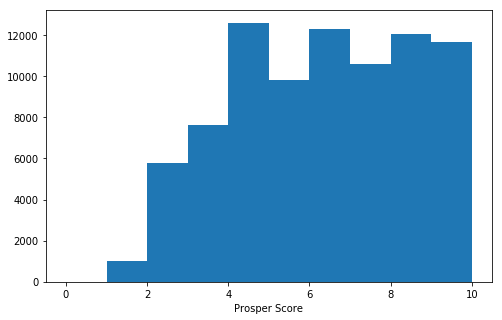

In [53]:
# Histogram of propser score less than 10
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['ProsperScore'].max()+1, 1)

plt.hist(data = loans, x = 'ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.show()

>For the prosper score after I removed the scores of 11 from the data. The distribution is multimodal, there are peaks around 4, 6, and 8 which are very close to eachother. 

>Next I am going to look at the loan term.

In [54]:
# Count of loans in each loan term
loans.Term.value_counts()

36    57646
60    24138
12     1613
Name: Term, dtype: int64

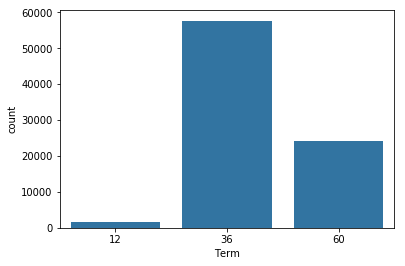

In [55]:
# Count plot loan term 
color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'Term', color = color);

>From this bar chart it looks like the most loans fall into the 36 month term while the next closest is the 60 month term. The 12 month term has a low loan count compared to the other two loan term categories. 

>I will now look at the propser prinicipal borrowed. 

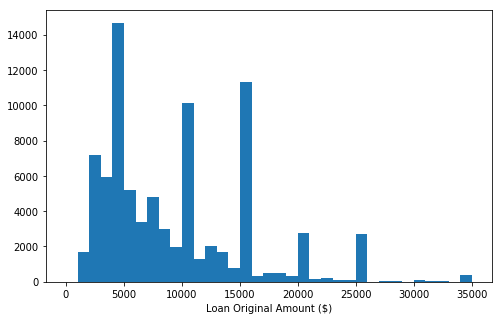

In [56]:
# Histogram loan original amount
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['LoanOriginalAmount'].max()+1000, 1000)

plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.show()

>There are several peaks in this distribution most likely on the common loan amounts, but the distribution has a long tail on the left side. Right before and after 5,000 and then at 10,000, 20,000, and 25,000 there are peaks. The most extreme peak it the one before 5,000. 

>Next I will look at lender yield. 

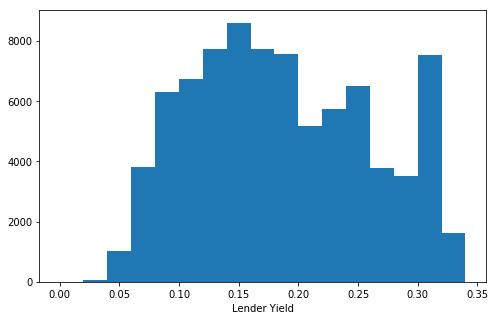

In [57]:
# Histogram lender yield
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)

plt.hist(data = loans, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.show()

>Lender yield looks like a normal distribution from 0 to 0.20 but after that it becomes bimodal because there is another peak. The Distribution is left skewed showing that many of the lender yields fall between 0.05 and 0.20. The largest portion of lender yields are between 0.10 and 0.20, but there is a peak around 0.30. 

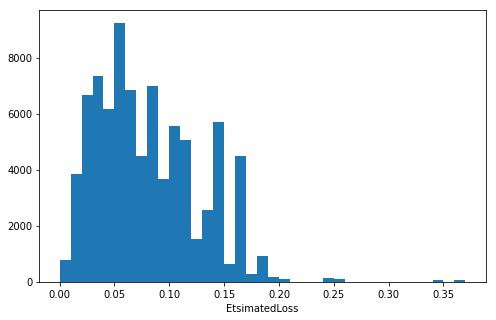

In [58]:
# Histogram estimated loss
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['EstimatedLoss'].max()+0.01, 0.01)

plt.hist(data = loans, x = 'EstimatedLoss', bins = bins)
plt.xlabel('EtsimatedLoss')
plt.show()

>The estimated loss variable has a normal distribution that is left skewed between 0 and 0.20. The largest portion of data falls into 0.05 and 0.10. 

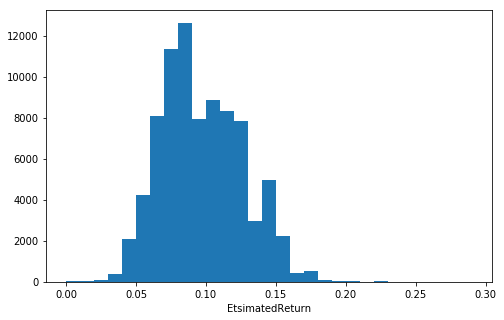

In [59]:
# Histogram estimated return
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['EstimatedReturn'].max()+0.01, 0.01)

plt.hist(data = loans, x = 'EstimatedReturn', bins = bins)
plt.xlabel('EtsimatedReturn')
plt.show()

>I thought that the estimated return may be similar to the estimated loss distribution but it appears to be a more normal distribution that is less left skewed than esitmated loss. The range is similar to the estimated loss but the largest protion of data falls between 0.05 and 0.15 and there are very few outliers. 

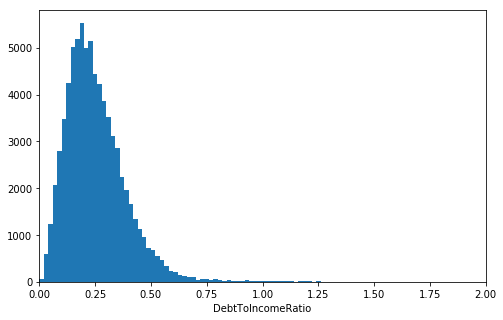

In [60]:
# Histogram Debt to income ratio
plt. figure(figsize = [8, 5])

bins = np.arange(0, loans['DebtToIncomeRatio'].max()+ 0.02, 0.02)

plt.hist(data = loans, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.xlim(0, 2) # Limit the scale 
plt.show()

>The debt to income ratio is a normal distribution that is left skewed with the highest peaks around 0.15, and 0.25. The distribution falls rapidly after peaking around 0.30. 

>The loan count increases steadily throughout the time period in the dataset, showing that the number of loans originated each year is increasing. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed a transformation on the investors variable, in the first histogram I plotted the variable was showing an extreme skew to the left but after I performed the transformation the distribution appeared normal. The investors variable was highest around 50. The next variable I investigated, listing category, showed that most of the loan data fell into category debt Consolidation. The other categories had very low counts compared to this category. In the propser score it was interesting to see that it had peaks in loan counts around 4, 6, and 8. I was surprised to see that most of the loan data fell into the 36 month term while the 12 month loan term count was extremely low. For the loan orignial amount most of the data fell between 3,000 and 15,000 but there were large increases around the 10,000, 15,000, even 20,000 and 25,000 when there were very few data points right around those last numbers. The lender yield has a left skewed bimodal distribution, the largest portion of data falls between 0.10 and 0.20. The estimated loss and estimated return distributions were very similar but the return had less variability and outliers. The debt to income ratio has a normal distribution but it is left skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was interesting to find that when many of the variables were plotted on histograms they appeared left or right skewed. When investigating the prosper score I found that there were values above 10 which were incorrect because the highest score was 10, so I dropped the rows that had scores greater than 10. The prosper score was multimodal with three peaks in the distribution. I also changed the data type of listing category to a string because the numbered categories are not numeric data and I replaced the numbered categories with the actual loan categories from the explanation spreadsheet so that it would be easier to understand this data. 

## Bivariate Exploration

> In this section I want focus on the all of the varibales in relation to the lender yield.

In [61]:
# Create variable for numeric variables
n_var = ['ProsperScore', 'Investors', 'LenderYield', 'LoanOriginalAmount', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn', 'DebtToIncomeRatio']

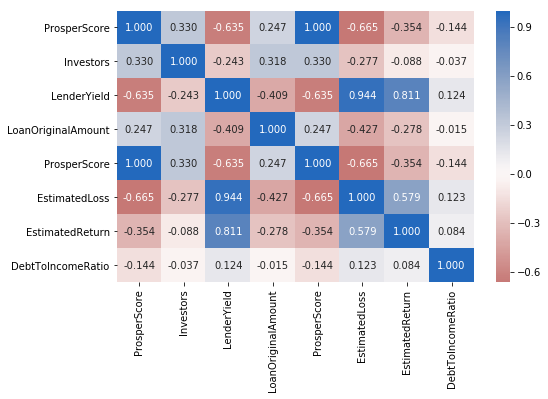

In [62]:
# Heatmap of numeric values
plt.figure(figsize = [8, 5])
sb.heatmap(loans[n_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>The lender yield is highly correlated with estimated loss and estimated return. There is also negative correlation between lender yield, prosper score, and loan original amount. The investors and debt to income ratio are not higly correlated with lender yield or any of the other variables. 

>Next I want to see what these correlations look like between prosper score, estimated loss, estimated return, loan original amount, and lender yield. 

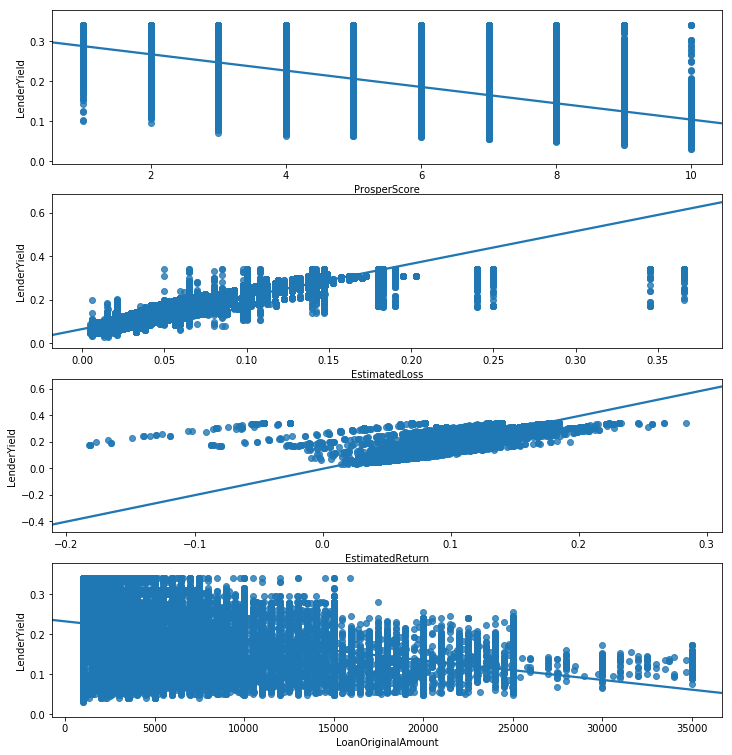

In [63]:
# Regplots of numeric variables vs. lender yield
fig, ax = plt.subplots(nrows=4, figsize = [12,13])
color = sb.color_palette()[0]

sb.regplot(data = loans, x = 'ProsperScore', y = 'LenderYield', color = color, ax = ax[0])
sb.regplot(data = loans, x = 'EstimatedLoss', y = 'LenderYield', color = color, ax = ax[1])
sb.regplot(data = loans, x = 'EstimatedReturn', y = 'LenderYield', color = color, ax = ax[2])
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'LenderYield', color = color, ax = ax[3]);

>From the plots above I can see that th lender yield increases as the estimated loss and return increase and the lender yield decreases as the prosper score and loan originl amount increase. These relationships make sense because the propser score is most likley higher on loans with less risk which most likley also have less yield. The yield increases with estimated return and loss because there is more risk. I want to take a closer look at the loan original amount because there are so many points on the plot above it is hard to see the complete relationship. 

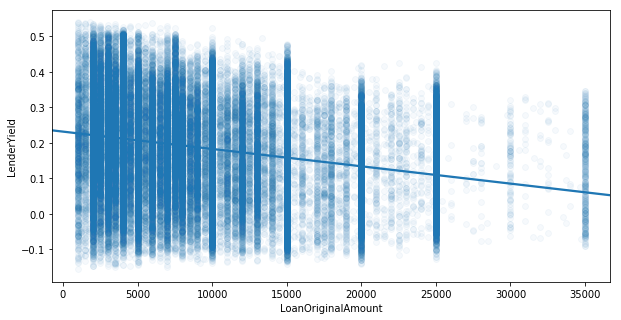

In [64]:
# Regplot lender yield vs. loan original amount with transparency and jitter
plt.figure(figsize=(10, 5))

sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'LenderYield',
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/25});

>After appyling the jitter and transparency to this regplot it is easier to the relationship between lender yield and loan orginal amount. The lender yield steadily decreases up to loan amount of 10,000 after 15,000 there is a much more drastic drop in the lender yield. 

>I am curious about the relationships between listing category, term, and lender yield so I will investigate these next.

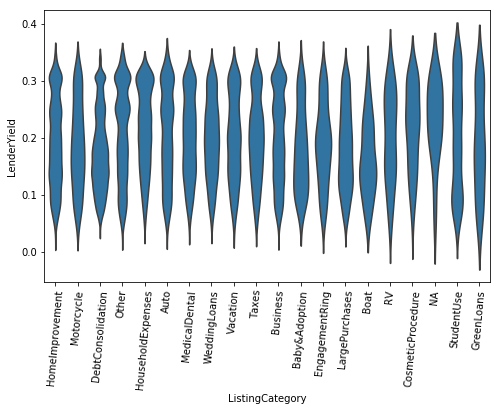

In [65]:
# Violin plots lender yield vs. listing category 
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'ListingCategory', y = 'LenderYield', color = color, inner = None)
plt.xticks(rotation=85);

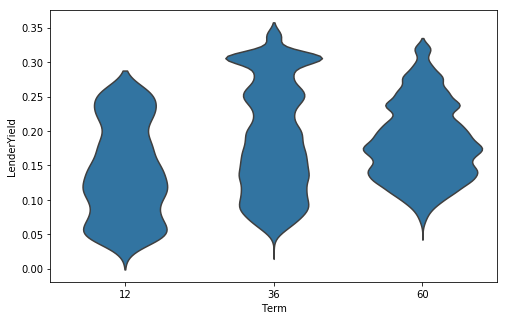

In [66]:
# Violin plots lender yield vs. term
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'Term', y = 'LenderYield', color = color, inner = None);

>The highest lender yields appear to be in Student Use and Green Loans. These two categories also have the largest range of lender yields. Categories Debt Consolidation, Baby & Adoption, and Boat are all large toward the bottom showing a higher number of low lender yields. I am surpirsed that the listing category did not have more influence on the lender yield. You can also see the many of the listing categories have an increase around a lender yield of 0.30. 

>The 12 month term has the lowest lender yield and more mild increases and decreases than the other two terms. The 36 month term has the highest lender yield with a sharp increase around 0.30, but it also has the largest range of all three terms. The 60 month term has an extreme increase around 0.10 and then starts to decrease around 0.20. The lender yield seems to be impacted more by the loan term than the listing category. 

>The next relationships  I am going to investigate are between listing category and the three other numeric variables. 

<Figure size 864x360 with 0 Axes>

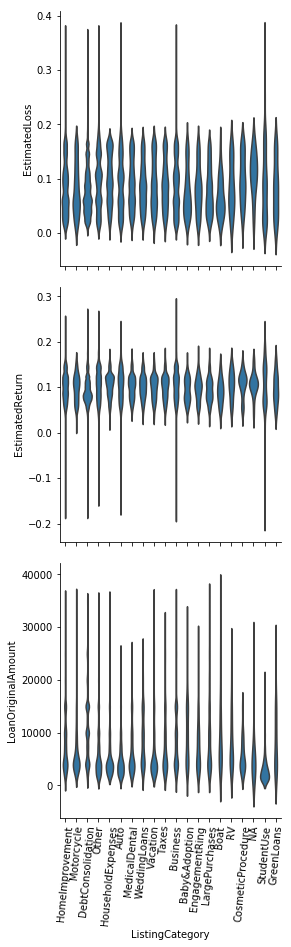

In [67]:
# Function to create violin plots with pairgrid
def violingrid(x, y, **kwargs):
    color = sb.color_palette()[0]
    sb.violinplot(x,y, color = color, inner = None)
    plt.xticks(rotation=85)
# Violin plot listing category vs. extimated loss, estimated return, and loan original amount    
plt.figure(figsize = [12,5])
g = sb.PairGrid(data = loans, x_vars = ['ListingCategory'], y_vars = ['EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'], height = 4)
g.map(violingrid);

<Figure size 864x360 with 0 Axes>

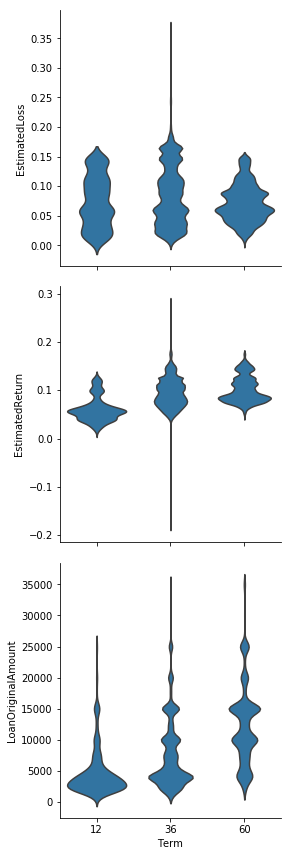

In [68]:
# Function to create violin plots with pairgrid
def violingrid(x, y, **kwargs):
    color = sb.color_palette()[0]
    sb.violinplot(x,y, color = color, inner = None)
    
plt.figure(figsize = [12,5])
g = sb.PairGrid(data = loans, x_vars = ['Term'], y_vars = ['EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'], height = 4)

g.map(violingrid);

>The estimated loss and estimated return seem to be impacted by the same listing categories. The shapes of the violins in the category plots for estimated loss and estimated return are very similar most of the categories have violin shapes that match but the estimated loss has larger ranges than the estimated return. The categories that show extremes are debt consolidation, home improvement, business, student use, auto, and other. The loan original amount appears to have less variability between the categories than the other two variables. 

>The term violin plots show a very similar shape for the estimated loss on 12 and 36, but 36 has a higher number of estimated losses which may be because there are many more loans in this category in the data. The estimated loss has a lot wider shape on 60 towards the bottom which shows that there are greater estimated losses on longer term loans around 0.05. The estimated return has shapes similar to the estimated loss but they are more condensed showing that the estimated return for loans in all three terms has most points between 0 and 0.1. The loan original amount shows many more loan amounts below 5,000 in terms 12 and 36. The loans with a 60 month term had less amounts towards the bottom and more around 10,000 and 15,000. This makes sense because larger loans will have longer terms. The violins on 36 and 60 are similar to the histogram plotted eariler of just the loan original amount. 

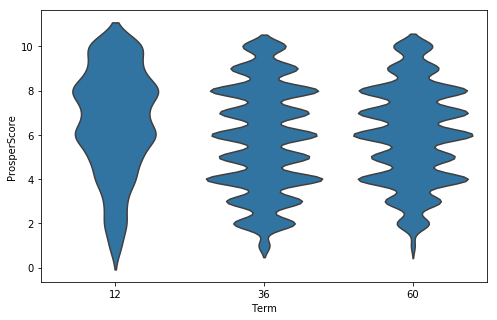

In [69]:
# Violin plots prosper score vs. term
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'Term', y = 'ProsperScore', color = color, inner = None);

The prosper score for loans with 36 and 60 month terms are very similar and have peaks similar to the peaks in the previous histogram at 4, 8, and 8. The 12 month term prosper scores are interesting because they really differ from the other two and it looks like the 12 month loans have a large number of high prosper scores with more mild increases and decreases than the other two terms. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this analysis I took a deeper look at the relationships between lender yield and the other variables being investigated. The first thing I did was plot a heat map with the correlation coefficients of the different variables in relation to eachother. I found that estimated loss, estimated return, lender yield, prosper score, and loan original amount are correlated more than any of the other variables. After this discovery I decided to just focus on these variables. I plotted all of the numeric variables against lender yield and found that propser score and loan original amount have negative relationships with lender yield and estimated return and estimated loss have positive relationships with lender yield. When lender yeild was plotted against listing category I found student use and green loans to have the highest lender yields. Many of these categories were very close in range and width with very sublte curves. The 36 month term had the highest lender yield. The shape of the 60 month term was very wide around the bottom portion of the violin showing a large number of low lender yields compared to the other two terms. I found it interesting that the 36 month term had a sharp increase and decrease in lender yield around 0.30. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found that estimated return and estimated loss had their highest and lowest data points in 6 of the listing categories. I found this interesting because some of these listing categories did not have a high loan count in the first count plot. The 36 month term has loans with the highest estimated loss and return. Even though the 36 month term loan has the highest points the 12 and 60 month term have the most estimated returns between 0 and 0.10. The shape of the violin of the 12 month term and the prosper score was very different from the other two terms and had much more mild curves. 

## Multivariate Exploration

> After the discoveries I made in the previous section, I want to invetigate the lender yield, estimated loss, estimated return, prosper score, and term further.

In [72]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['EstimatedReturn'].max()+0.01, 0.01)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)

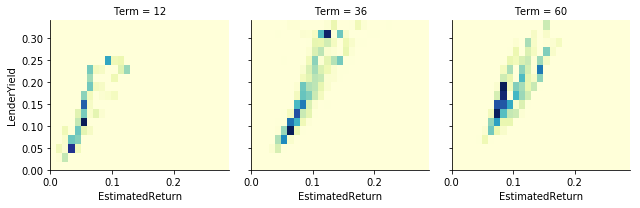

In [76]:
# Plot faceted heat map of lender yield and estimated return on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'EstimatedReturn', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('EstimatedReturn')
g.set_ylabels('LenderYield')

plt.show()

>In the faceted heat maps above you can see that the majority of the loans have low estimated return and low lender yield. The positive relationship between lender yield and estimated return is displayed. The estimated return and lender yield are lowest in the 12 month term, while 36 the month term has the highest lender yield. The first two terms have lender yields that differ but the estimated return is very similar for these terms the data points on 12 drop off around 0.13 and the data points for 36 drop off around 0.16. The 60 month term has a more grouped plot of colors where the lowest lender yield is around 0.07 and the lowest estimated return around 0.05. The 60 month term has an inreased number of estimated return shown by the grouping of colors dropping off around an estimated return of 0.19. These heat maps show that the estimated return increases as the term increases and the lender yield increases as well but it does not seem to have a systematic pattern. 

In [54]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['EstimatedLoss'].max()+0.01, 0.01)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)

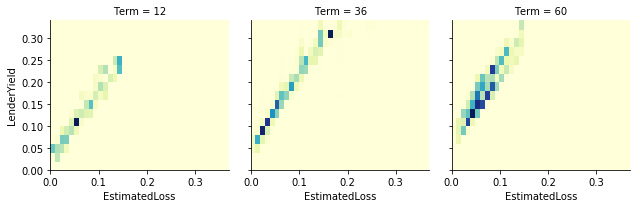

In [55]:
# Plot faceted heat map of lender yield and estimeted loss on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'EstimatedLoss', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('EstimatedLoss')
g.set_ylabels('LenderYield')

plt.show()

The estimated loss increases as the lender yield increases. The lender yield increases as the term increases but similar to the pervious heat maps there is not a systematic pattern for the increase. The 60 month term has the most loans with a higher lender yield but about the same estimated loss as the other two terms. The estimated loss remains close to the same in all three terms. 

In [42]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['LoanOriginalAmount'].max()+2000, 2000)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)

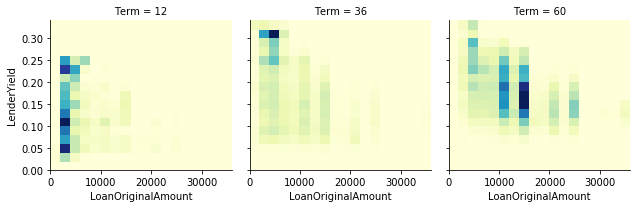

In [43]:
# Plot faceted heat map of lender yield and loan original amount on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('LenderYield')

plt.show()

>From the faceted heat maps above we can see that the 12 month term has a large range of lender yields all along low loan amounts, while the 36 month term has high lender yields at low loan amounts. The 60 month term has a range of lender yields at higher loan amounts, which makes sense that higher loan amounts would have longer terms. 

In [31]:
# Function to create heat map with pairgrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, loans['ProsperScore'].max()+1, 1)
    bins_y = np.arange(0, loans['LenderYield'].max()+0.02, 0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette)

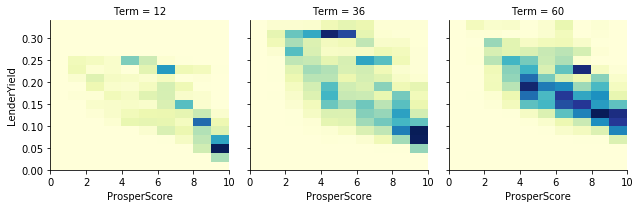

In [33]:
# Plot faceted heat map of lender yield and prosper score on 12, 36, and 60 term
g = sb.FacetGrid(data = loans, col = 'Term', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'ProsperScore', 'LenderYield', color = 'YlGnBu')
g.set_xlabels('ProsperScore')
g.set_ylabels('LenderYield')

plt.show()

>These maps display the negative relationship between lender yield and prosper score where lender yield decreases as prosper score increases. It is interesting to see that as the term increases the lender yield increases and then decreases more and the prosper score increases more. The 36 month term still remains with the highest lender yield similar to the other heat maps and violin plots. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The lender yield and estimated loss and return maintained psotive relationships in the faceted heat maps but the estimated return increased with the increase of the term, while the estimated loss remained the same in each term. The lender yield did not seem to have a sytematic pattern in relation to the loan orginal amount and the term. The lender yield has a large range on the 12 month term around low loan amounts and then the lender yield is highest in the 36 month term at low loan amounts. The lender yield also ranges on the 60 month term at higher loan amounts. The prosper score and the lender yield display a negative relationship and as the term increases the propser score increases but the lender yield has a peak in the 36 month term and then decreases from there. 

### Were there any interesting or surprising interactions between features?

> It is interesting that in every heat map the lender yield has a peak in the 36 month term. The 60 month term in every map has no lender yields below 0.07, which means that the lender yields on 60 month terms have a floor that the yields do not go below. I was also surprised that the prosper score increased so much in the 60 month term. 